**Heart Attack and Analysis & Prediction Dataset from Kaggle**

**Exploration**

In [ ]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
hearts = Table().read_table('heart.csv')

First 10 rows

In [ ]:
hearts.take(np.arange(0,10))

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Age vs. Resting Blood Pressure and likelihood of heart attack as output (0 being low risk and 1 being high risk)

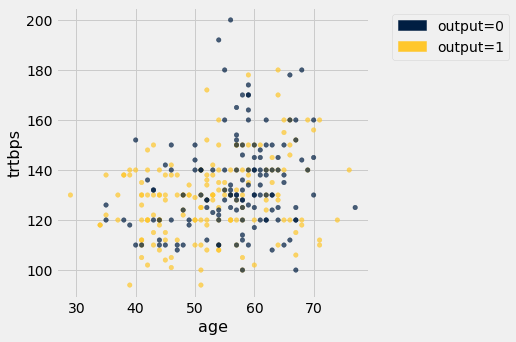

In [ ]:
hearts.scatter('age', 'trtbps', group='output')

**Estimation**

Statistic Values for cholesterol level

In [ ]:
chol = hearts.column('chol')
print('mean:', np.mean(chol))
print('median:', np.median(chol))
print('standard deviation:', np.std(chol))

mean: 246.264026403
median: 240.0
standard deviation: 51.7451510105


Cholesterol Histogram

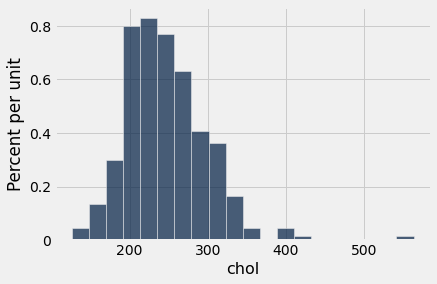

In [ ]:
hearts.hist('chol', bins=20)

Bootstrap with 90% confidence interval of cholesterol means re-sampling 10,000 times

5th percentile of bootstrap means: 242.62
95th percentile of bootstrap means: 250.166


Iteration,Statistic (Mean)
0,243.914
1,246.792
2,244.672
3,248.674
4,244.152
5,248.084
6,243.076
7,246.94
8,252.322
9,245.17


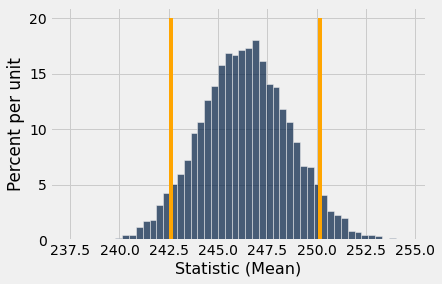

In [ ]:
sample = hearts.sample(10000, with_replacement=True)
bootstrap = Table().with_columns('Iteration', make_array(),
                                 'Statistic (Mean)', make_array())

population_mean = np.mean(hearts.column('chol'))
for i in np.arange(10000):
  resample = sample.sample(500, with_replacement=True)
  statistic = np.mean(resample.column('chol'))
  bootstrap.append((i, statistic))

means = bootstrap.column('Statistic (Mean)')
bootstrap_lower = percentile(5, means)
boostrap_higher = percentile(95, means)
print("5th percentile of bootstrap means:", bootstrap_lower)
print("95th percentile of bootstrap means:", boostrap_higher)

bootstrap.hist('Statistic (Mean)', bins = 50)

plots.plot((bootstrap_lower, bootstrap_lower), (0, 0.2), color='orange')
plots.plot((boostrap_higher, boostrap_higher), (0, 0.2), color='orange')
bootstrap

**Hypothesis Testing**

Table of patients with ECG results

In [ ]:
restecg_norm = hearts.where('restecg', 0)
restecg_abnorm = hearts.where('restecg' ,1)
restecg_abnorm = restecg_abnorm.append(hearts.where('restecg', 2))
restecg_norm

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
58,0,3,150,283,1,0,162,0,1,2,0,2,1
65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
44,1,1,130,219,0,0,188,0,0,2,0,2,1
54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


Table of patients with abnormal ECG results

In [ ]:
restecg_abnorm

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


Fraction of people likely to have a heart attack of normal and abnormal ECG results groups

In [ ]:
normal_mean = np.mean(restecg_norm.column('output'))
abnormal_mean = np.mean(restecg_abnorm.column('output'))
print('normal mean:', normal_mean)
print('abnormal mean:', abnormal_mean)

normal mean: 0.462585034014
abnormal mean: 0.621794871795


Hypothesis test to see if ECG results and likelood of heart attack are related

Observed value of the test statistic: 0.159209837781
p-value of test: 0.0059


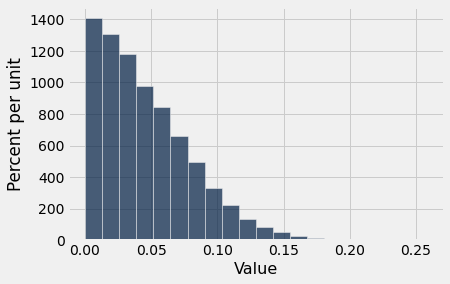

In [ ]:
norm_output = restecg_norm.column('output')
abnorm_output = restecg_abnorm.column('output')

possible_outputs = np.append(norm_output, abnorm_output)

table_outputs = Table().with_columns("Iteration", make_array(), "Value", make_array())

for i in np.arange(10000):
  norm = np.random.choice(possible_outputs, 147)
  abnorm = np.random.choice(possible_outputs, 156)
  value = abs(np.average(norm) - np.average(abnorm))
  table_outputs.append((i, value))


table_outputs.hist("Value", bins=20)

observed_value = abs(np.average(norm_output) - np.average(abnorm_output))
print("Observed value of the test statistic:", observed_value)

p_value = (np.average(table_outputs.column("Value") > observed_value))
print("p-value of test:", p_value)

For this we would have to reject the null hypothesis. A p-value less than 1% means this is a statistically significant result. Rejecting would mean that there is a higher chance of heart attack is higher for the abnormal group

**Creating models**

Convert variables to standard units

In [ ]:
def standard_units(table, column_name):
    table_column = table.column(column_name)
    mean = np.mean(table_column)
    std = np.std(table_column)
    std_units = (table_column -mean) / std
    return std_units

Extracted features into NumPy arrays

In [ ]:
from sklearn.neural_network import MLPRegressor
heart_std = hearts.with_columns("age", standard_units(hearts, "age"),
                                   "trtbps", standard_units(hearts, "trtbps"),
                                   "chol", standard_units(hearts, "chol"),
                                   "thalachh", standard_units(hearts, "thalachh"),
                                   "oldpeak", standard_units(hearts, "oldpeak"))

X = heart_std.select('age', 'trtbps', 'chol', 'thalachh', 'oldpeak').values
y = hearts.column('output')
neural_network = MLPRegressor(hidden_layer_sizes=(5), random_state=0)
neural_network.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=5, random_state=0)

Train / test split of 70% to 30%

In [ ]:
output = hearts.column('output')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=5)

Neural Network model with hidden layer size of 5

In [ ]:
neural_network = MLPClassifier(hidden_layer_sizes=(5))
neural_network.fit(X_train, y_train)
y_predicted = neural_network.predict(X_test)
accuracy = sum(y_test == y_predicted) / len(y_predicted)
print("Accuracy:", accuracy * 100, '%')
print("Error:", (1 - accuracy) * 100, "%")

Accuracy: 70.3296703297 %
Error: 29.6703296703 %


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!pip install xgboost
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)
from xgboost import XGBRegressor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y_pred = neural_network.predict(X_test)

XGBoost model

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_predictxg = xgboost_model.predict(X_test)
accuracyxg = sum(y_test == y_predictxg) / len(y_predictxg)
print("Accuracy:", accuracyxg * 100, '%')
print("Error:", (1 - accuracyxg) * 100, "%")

Accuracy: 67.032967033 %
Error: 32.967032967 %


K-NN mdoel

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_predictsk = knn_model.predict(X_test)
accuracysk = sum(y_test == y_predictsk) / len(y_predictsk)
print("Accuracy:", accuracysk *100, '%')
print("Error:", (1 - accuracysk) * 100, "%")

Accuracy: 65.9340659341 %
Error: 34.0659340659 %


Precision and recall metrics for each model (Key: true positive, false positive, true negative, false negative

In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in np.arange(len(y_predicted)):
  x = y_test[i]
  y = y_predicted[i]
  if x == 0 and y == 0:
    TN = TN + 1
  if x == 1 and y == 1:
    TP = TP + 1
  if x > y:
    FN = FN + 1
  if x < y:
    FP = FP + 1
print('neural network results:', TP, FP, TN, FN)

neural network results: 32 19 32 8


In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in np.arange(len(y_predictxg)):
  x = y_test[i]
  y = y_predictxg[i]
  if x == 0 and y == 0:
    TN = TN + 1
  if x == 1 and y == 1:
    TP = TP + 1
  if x > y:
    FN = FN + 1
  if x < y:
    FP = FP + 1
print('xgboost results:', TP, FP, TN, FN)

xgboost results: 30 20 31 10


In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in np.arange(len(y_predictsk)):
  x = y_test[i]
  y = y_predictsk[i]
  if x == 0 and y == 0:
    TN = TN + 1
  if x == 1 and y == 1:
    TP = TP + 1
  if x > y:
    FN = FN + 1
  if x < y:
    FP = FP + 1
print('knn results:', TP, FP, TN, FN)

knn results: 30 21 30 10


We would like to choose the model with the highest accuracy, along with the least amount of false negatives, as they are the most dangerous because no warning with high risk creates a high chance of a heart attack. The neural network model had the highest accuracy and the lowest amount of false negatives, so that model would most likely be most successful.